# Model Figures

In [469]:
from os.path import join
import numpy as np
import xarray as xr
from scipy import stats

In [470]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import ternary

In [471]:
import arviz as az

In [472]:
from matplotlib import style

In [473]:
style.use(join("..", "style.mplstyle"))

## load model results

In [474]:
prior = xr.load_dataset("../model-results/prior.nc")
post = xr.load_dataset("../model-results/posterior.nc")

## Load BAYSPAR TEX86 predictions

In [475]:
df_index_vals = pd.read_excel("../data/processed/CascadiaMargin_index_values.xlsx")

## define labels

In [265]:
GDGTs = ["G0", "G1", "G2", "G3", "G4", "Cren", "G5"]
communities = [
    "planktonic",
    "benthic-methane cycling",
    "benthic-non-methane cycling",
]
locations = ["Astoria Canyon", "Hydrate Ridge", "McArthur Canyon"]

## Define color palettes


In [323]:
pal_locations = ["teal", "orangered", "olive"]
pal_communities = ["mediumorchid", "darkorange", "seagreen"]

## figures

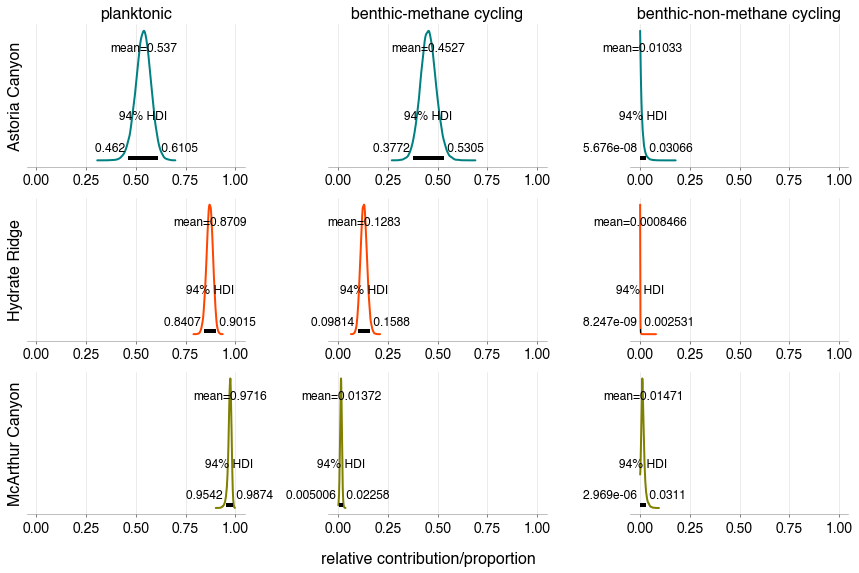

In [435]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for i, location in enumerate(locations):
    axs[i, 0].set_ylabel(location, fontsize=16)
for j, com in enumerate(communities):
    for i in range(3):
        az.plot_posterior(
            post["F"][:, :, i, j], ax=axs[i, j], color=pal_locations[i], round_to=4
        )
    axs[0, j].set_title(com, fontsize=16)
    for i in (1, 2):
        axs[i, j].set_title(None)
fig.supxlabel("relative contribution/proportion", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/locations_F.png", dpi=400)

/Users/katherinekeller/opt/anaconda3/lib/python3.8/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


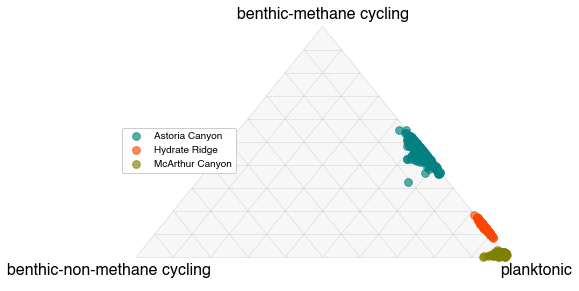

In [314]:
fig, ax = plt.subplots(figsize=(6, 4))
tax = ternary.TernaryAxesSubplot(ax=ax)
ax.axis("off")
tax.gridlines(color="grey", alpha=0.5, multiple=0.1)
tax.right_corner_label(communities[0], fontsize=16)
tax.top_corner_label(communities[1], va="top", fontsize=16)
tax.left_corner_label(communities[2], fontsize=16)
for i, location in enumerate(locations):
    tax.scatter(
        (post["F"].values[j % 4, j, i, :] for j in range(250)),
        s=60,
        alpha=0.65,
        color=pal_locations[i],
        label=location,
    )
ax.legend(loc="center left")
fig.tight_layout()
plt.savefig("../manuscript-figures/ternary_plot.png", dpi=400)

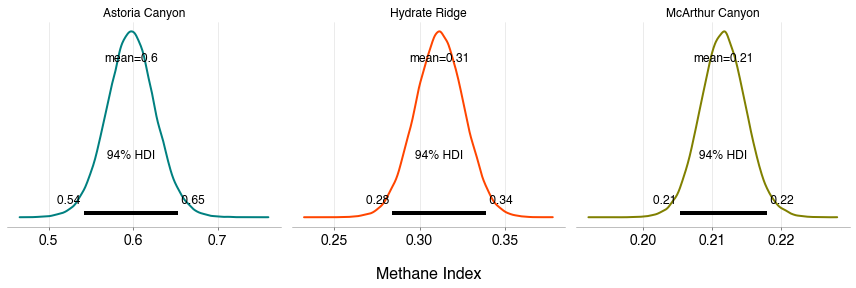

In [361]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=False)
for i, ax in enumerate(axs):
    az.plot_posterior(
        post["Location Methane Index"][:, :, i], color=pal_locations[i], ax=ax
    )
    ax.set_title(locations[i])
fig.supxlabel("Methane Index", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/locations_MI.png", dpi=400)

<xarray.DataArray 'Location Methane Index' ()>
array(0.31142549)
Coordinates:
    Location Methane Index_dim_0  int32 1

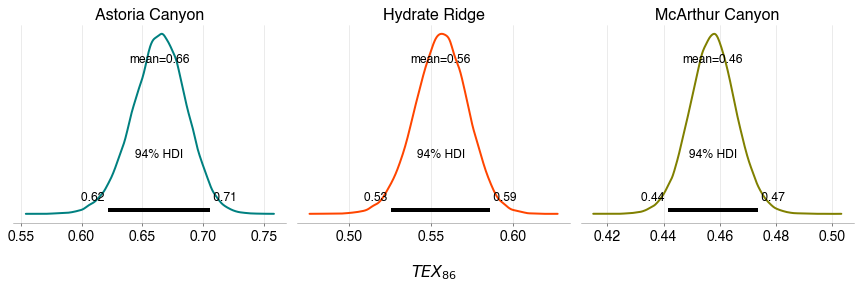

In [359]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=False)
for i, ax in enumerate(axs):
    az.plot_posterior(post["Location TEX86"][:, :, i], color=pal_locations[i], ax=ax)
    ax.set_title(locations[i], fontsize=16)
fig.supxlabel("$TEX_{86}$", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/locations_tex86.png", dpi=400)

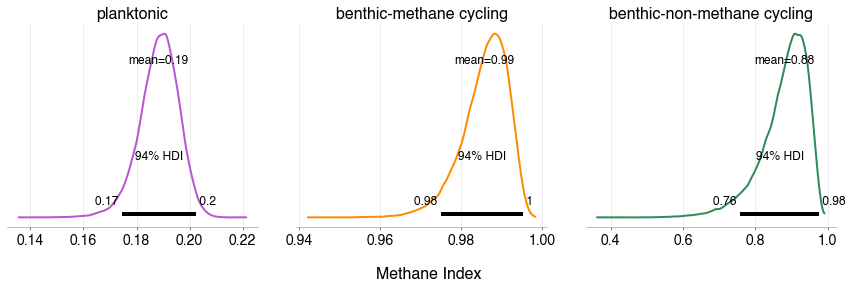

In [360]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=False)
for i, ax in enumerate(axs):
    az.plot_posterior(
        post["Community Methane Index"][:, :, i], color=pal_communities[i], ax=ax
    )
    ax.set_title(communities[i], fontsize=16)
fig.supxlabel("Methane Index", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/communities_MI.png", dpi=400)

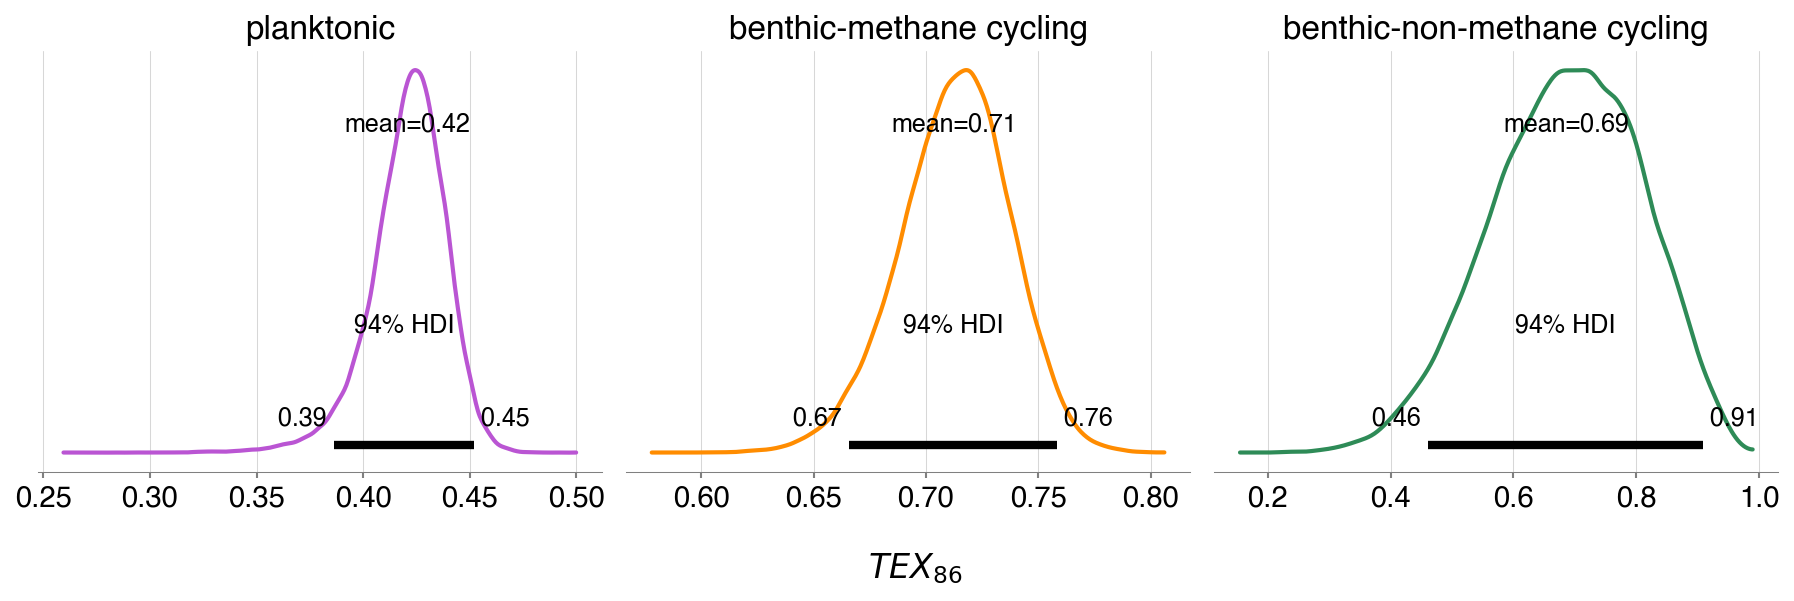

In [483]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=False)
for i, ax in enumerate(axs):
    az.plot_posterior(post["Community TEX86"][:, :, i], color=pal_communities[i], ax=ax)
    ax.set_title(communities[i], fontsize=16)
fig.supxlabel("$TEX_{86}$", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/communities_tex86.png", dpi=400)

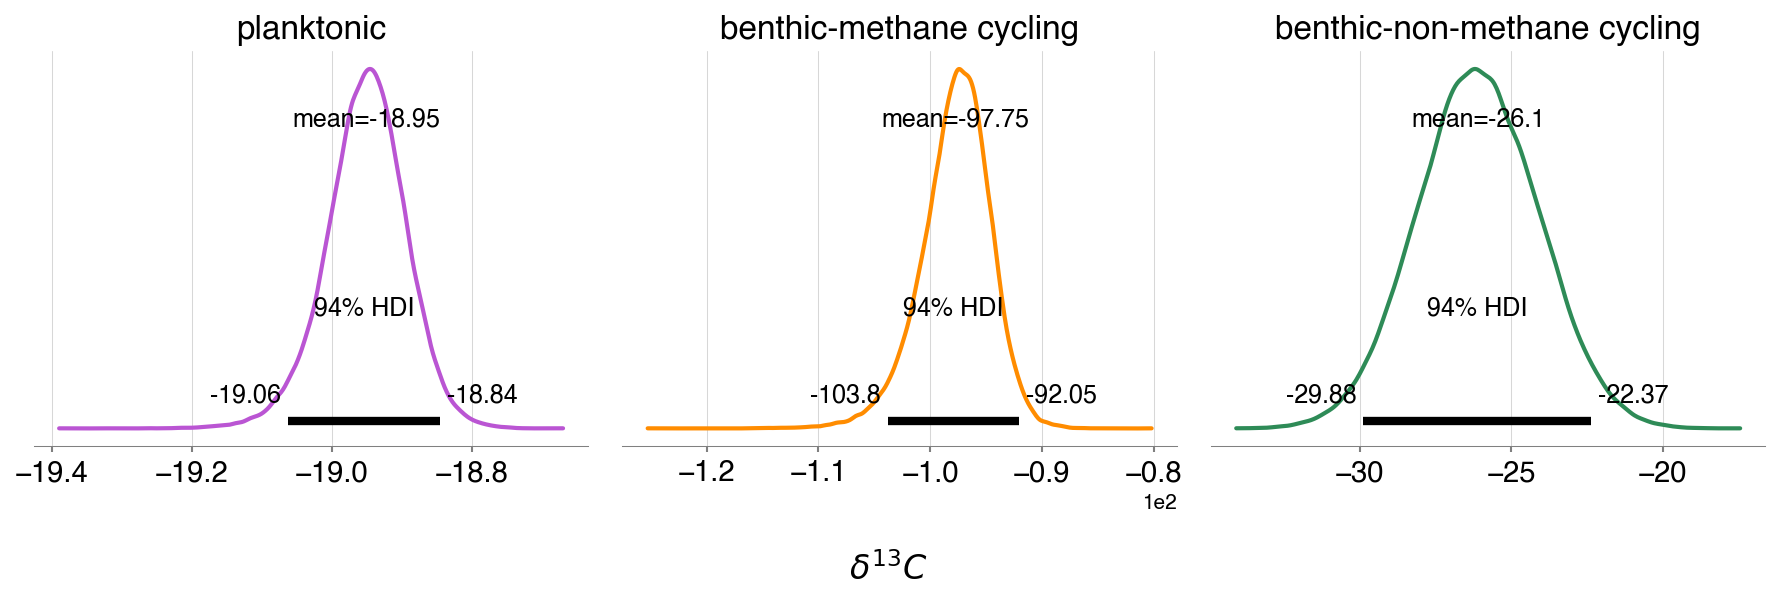

In [484]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=False)
for i, ax in enumerate(axs):
    az.plot_posterior(post["D"][:, :, i], color=pal_communities[i], round_to=4, ax=ax)
    ax.set_title(communities[i], fontsize=16)
fig.supxlabel("$\delta^{13}C$", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/communities_d13C.png", dpi=400)

In [273]:
x = post["F"].values
# stack(sample=("chain", "draw"))[i, 1, :].values
# x = np.random.choice(x.shape[0], size=1000, replace=False)
x.shape

(16, 4000, 3, 3)

<ipython-input-480-40f502007bf6>:15: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


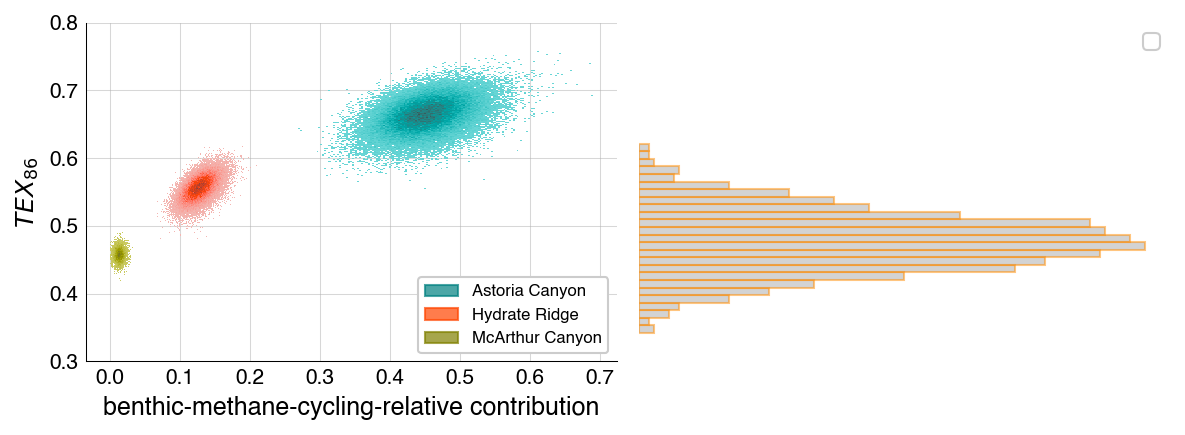

In [480]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax1 = ax[0]

# Initialize lists to hold combined data
combined_x = []
combined_y = []

# Collect data from all locations
for i, location in enumerate(locations):
    x = post["F"].stack(sample=("chain", "draw"))[i, 1, :].values
    y = post["Location TEX86"].stack(sample=("chain", "draw"))[i, :].values

    # Plotting the histogram for each location
    sns.histplot(x=x, y=y, color=pal_locations[i], label=location, ax=ax1)
ax1.legend()


# Plot histogram on the second subplot using ax method directly
ax2 = ax[1]
ax2.hist(
    df_index_vals["bayspar_preds"],
    bins=25,
    density=True,
    alpha=0.5,
    color="darkgrey",
    edgecolor="darkorange",
    orientation="horizontal",
)

# Set labels and adjust axis limits
ax2.set_ylim([0.3, 0.8])
ax1.set_ylim([0.3, 0.8])
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.grid("on")
ax2.legend()
ax2.yaxis.grid(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

ax1.set_ylabel("$TEX_{86}$", fontsize=12)
ax1.set_xlabel("benthic-methane-cycling-relative contribution", fontsize=12)

ax1.legend(
    handles=[
        mpatches.Patch(color="teal", label="Astoria Canyon", alpha=0.7),
        mpatches.Patch(color="orangered", label="Hydrate Ridge", alpha=0.7),
        mpatches.Patch(color="olive", label="McArthur Canyon", alpha=0.7),
    ],
    loc="lower right",
    fontsize=8,
)
ax1.tick_params(axis="both", which="major", labelsize=10)

plt.tight_layout()
plt.savefig("../manuscript-figures/TEX86_benth_cont.png", dpi=400)

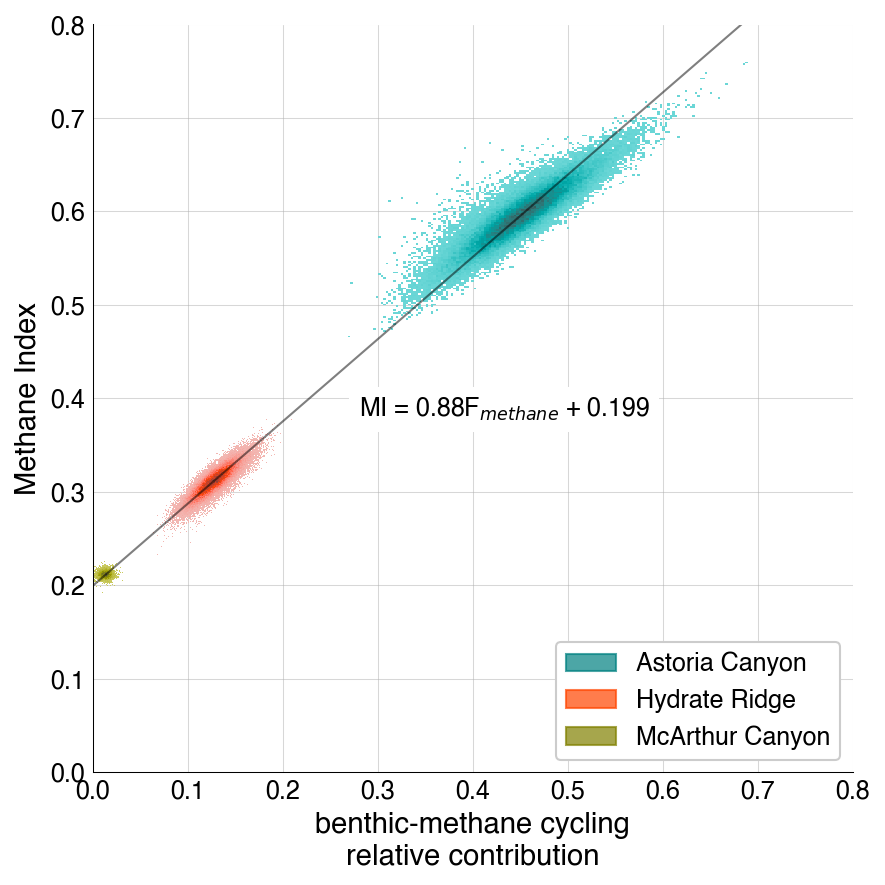

In [485]:
fig, ax = plt.subplots(figsize=(6, 6))
# plot posterior histograms
for i, location in enumerate(locations):
    x = post["F"].stack(sample=("chain", "draw"))[i, 1, :].values
    y = post["Location Methane Index"].stack(sample=("chain", "draw"))[i, 0, :].values
    sns.histplot(x=x, y=y, color=pal_locations[i], label=location, ax=ax)
# plot regression through posterior means
x = post["F"].mean(dim=("chain", "draw")).values[:, 1]
y = post["Location Methane Index"].mean(dim=("chain", "draw")).values.flatten()
reg = stats.linregress(x, y)
x = np.linspace(0, 0.7, 10)
y = reg.slope * x + reg.intercept
h = ax.plot(x, y, "k", alpha=0.5, linewidth=1, label="linear fit")
ax.annotate(
    "MI = " + f"{reg.slope:0.2g}" + "F$_{methane}$" + f" + {reg.intercept:0.3g}",
    (0.28, 0.38),
    fontsize=12,
    backgroundcolor="w",
)
# add legend and formatting
ax.legend(
    handles=[
        mpatches.Patch(color="teal", label=locations[0], alpha=0.7),
        mpatches.Patch(color="orangered", label=locations[1], alpha=0.7),
        mpatches.Patch(color="olive", label=locations[2], alpha=0.7),
    ],
    fontsize=12,
    loc="lower right",
)
# ax.plot([0, 0.8], [0, 0.8], linestyle="--", color="k", linewidth=0.75, alpha=0.5, zorder=0)
ax.set_xlabel(f"{communities[1]}\nrelative contribution", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_ylabel("Methane Index", fontsize=14)
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
fig.tight_layout()
plt.savefig("../manuscript-figures/MI_benth_cont.png", dpi=400)

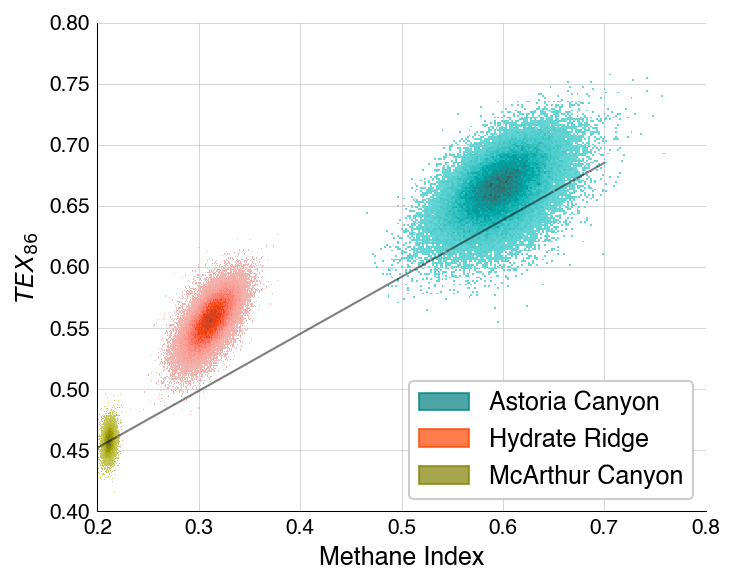

In [487]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(5, 4))
# plot posterior histograms
for i, location in enumerate(locations):
    x = post["Location Methane Index"].stack(sample=("chain", "draw"))[i, 0, :].values
    y = post["Location TEX86"].stack(sample=("chain", "draw"))[i, :].values
    sns.histplot(x=x, y=y, color=pal_locations[i], label=location, ax=ax)
# plot regression through posterior means
x = post["Location Methane Index"].stack(sample=("chain", "draw"))[i, 0, :].values
y = post["Location TEX86"].stack(sample=("chain", "draw"))[i, :].values
reg = stats.linregress(x, y)
x = np.linspace(0, 0.7, 10)
y = reg.slope * x + reg.intercept
h = ax.plot(x, y, "k", alpha=0.5, linewidth=1)
# add legend and formatting
ax.legend(
    handles=[
        mpatches.Patch(color="teal", label=locations[0], alpha=0.7),
        mpatches.Patch(color="orangered", label=locations[1], alpha=0.7),
        mpatches.Patch(color="olive", label=locations[2], alpha=0.7),
    ],
    fontsize=12,
    loc="lower right",
)
# ax.plot([0, 0.8], [0, 0.8], linestyle="--", color="k", linewidth=0.75, alpha=0.5, zorder=0)
ax.set_xlabel(f"{communities[1]}\nrelative contribution", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_ylabel("Methane Index", fontsize=24)
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
# ax.plot([0, 0.8], [0, 0.8], linestyle="--", color="k", linewidth=0.75, alpha=0.5, zorder=0)
ax.set_xlabel("Methane Index", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=10)
ax.set_ylabel("$TEX_{86}$", fontsize=12)
ax.set_xlim(0.2, 0.8)
ax.set_ylim(0.4, 0.8)
fig.tight_layout()
plt.savefig("../manuscript-figures/MI_TEX86.png", dpi=400)

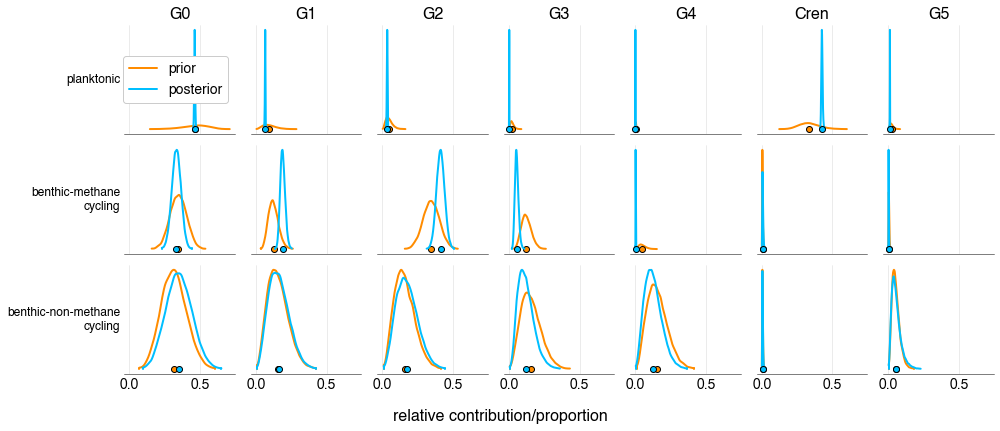

In [369]:
fig, axs = plt.subplots(3, 7, figsize=(14, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["X"],
    data_labels=["prior", "posterior"],
    colors=["darkorange", "deepskyblue"],
    hdi_prob=0.999,
    ax=axs,
)
for ax in axs.flatten():
    ax.set_title(None)
for i, com in enumerate(communities):
    axs[i, 0].set_ylabel(
        com.replace(" ", "\n"), rotation=0, va="center", ha="right", fontsize=12
    )
for j, comp in enumerate(GDGTs):
    axs[0, j].set_title(comp, fontsize=16)
fig.supxlabel("relative contribution/proportion", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/prios_vs_post_F.png", dpi=400)

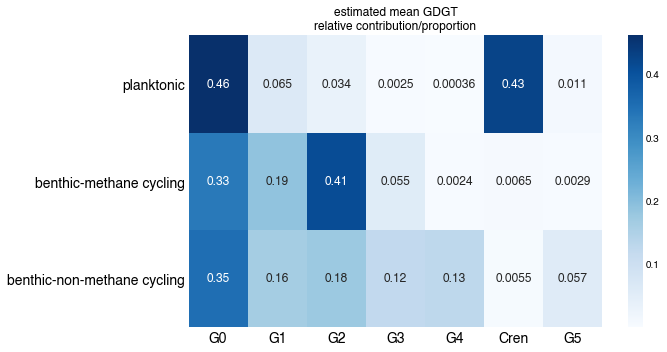

In [294]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(
    post["X"].mean(dim=("chain", "draw")),
    annot=True,
    cmap="Blues",
    ax=ax,
    annot_kws={"size": 12},
)
ax.set_yticklabels(
    [com.replace("/", "\n") for com in communities], rotation=0, fontsize=14
)
ax.set_xticklabels([comp.replace(" ", "\n") for comp in GDGTs], fontsize=14)
ax.set_title("estimated mean GDGT\nrelative contribution/proportion")
fig.tight_layout()
plt.savefig("../manuscript-figures/community_post_F.png", dpi=400)

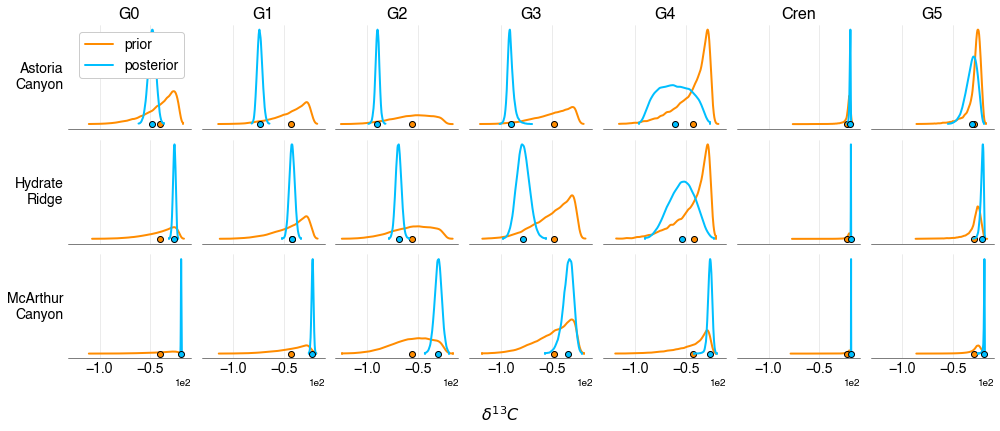

In [295]:
fig, axs = plt.subplots(3, 7, figsize=(14, 6), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["C"],
    data_labels=["prior", "posterior"],
    colors=["darkorange", "deepskyblue"],
    hdi_prob=0.999,
    ax=axs,
)
for ax in axs.flatten():
    ax.set_title(None)
for i, loc in enumerate(locations):
    axs[i, 0].set_ylabel(
        loc.replace(" ", "\n"), rotation=0, va="center", ha="right", fontsize=14
    )
for j, comp in enumerate(GDGTs):
    axs[0, j].set_title(comp, fontsize=16)
fig.supxlabel("$\delta ^{13}C$", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/priors_vs_post_d13C.png", dpi=400)

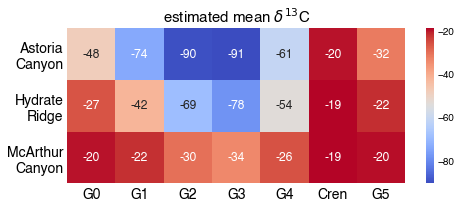

In [296]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.heatmap(
    post["C"].mean(dim=("chain", "draw")),
    annot=True,
    cmap="coolwarm",
    ax=ax,
    annot_kws={"size": 12},
)
ax.set_yticklabels(
    [loc.replace(" ", "\n") for loc in locations], rotation=0, fontsize=14
)
ax.set_xticklabels([comp.replace(" ", "\n") for comp in GDGTs], fontsize=14)
ax.set_title("estimated mean $\delta ^{13}$C", fontsize=15)
fig.tight_layout()
plt.savefig("../manuscript-figures/location_post_d13C.png", dpi=400)

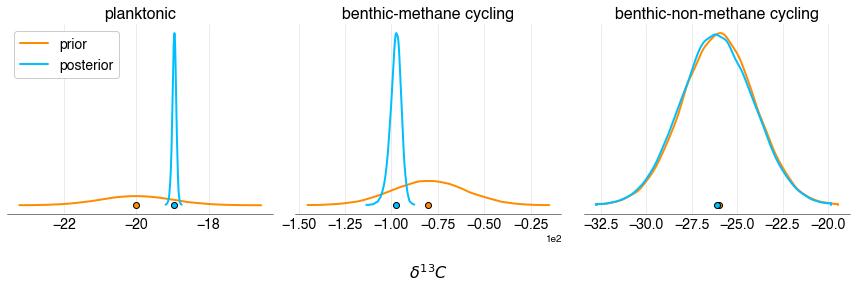

In [370]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
az.plot_density(
    [prior, post],
    var_names=["D"],
    data_labels=["prior", "posterior"],
    colors=["darkorange", "deepskyblue"],
    hdi_prob=0.999,
    ax=axs,
)
for i, ax in enumerate(axs):
    ax.set_title(communities[i], fontsize=16)
fig.supxlabel("$\delta ^{13}C$", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/community_priors_vs_post_d13C.png", dpi=400)

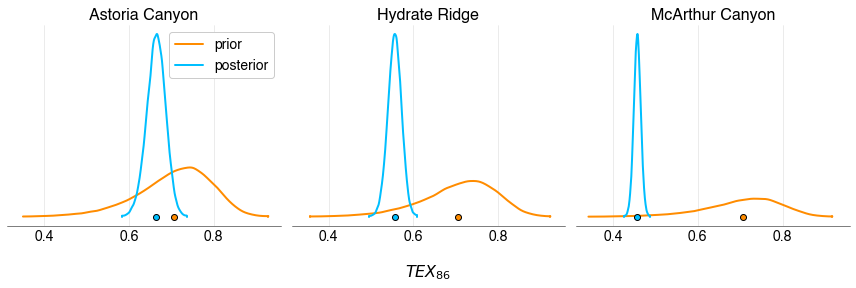

In [347]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["Location TEX86"],
    data_labels=["prior", "posterior"],
    colors=["darkorange", "deepskyblue"],
    hdi_prob=0.999,
    ax=axs,
)
for i, ax in enumerate(axs):
    ax.set_title(locations[i], fontsize=16)
fig.supxlabel("$TEX_{86}$", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/locations_priors_vs_post_TEX86.png", dpi=400)

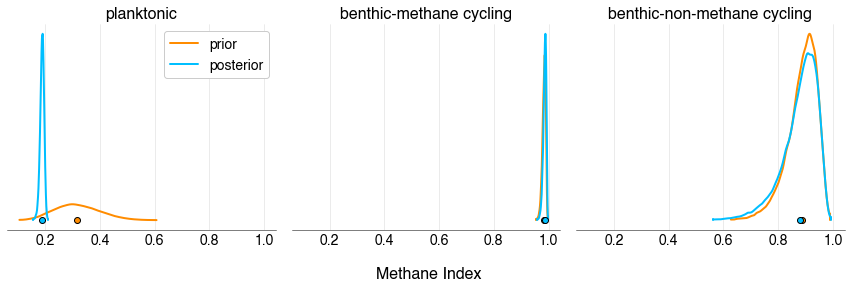

In [355]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["Community Methane Index"],
    data_labels=["prior", "posterior"],
    colors=["darkorange", "deepskyblue"],
    hdi_prob=0.999,
    ax=axs,
)
for i, ax in enumerate(axs):
    ax.set_title(communities[i], fontsize=16)
fig.supxlabel("Methane Index", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/community_priors_vs_post_MI.png", dpi=400)

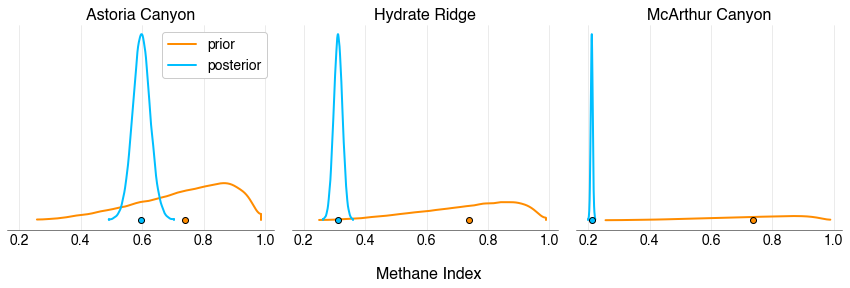

In [354]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)
az.plot_density(
    [prior, post],
    var_names=["Location Methane Index"],
    data_labels=["prior", "posterior"],
    colors=["darkorange", "deepskyblue"],
    hdi_prob=0.999,
    ax=axs,
)
for i, ax in enumerate(axs):
    ax.set_title(locations[i], fontsize=16)
fig.supxlabel("Methane Index", fontsize=16)
fig.tight_layout()
plt.savefig("../manuscript-figures/location_priors_vs_post_MI.png", dpi=400)